# (online food delivery platform Exploration)

## by (Sarah Oftadeh)




## Investigation Aspects

- main channel of revenue among all vendor types
- the difference of customer behaviour 
- order trend during different hours in a day for the most ordered vendor type
- failure/success of ordered of the most favorite vendortype and during different times in a day as well as the relationship of expected delivery time in determining the status. 
- Delivery/pickup preference in determining the fail/success of orders.


## Dataset Overview

> There is about 1m food orders for an online application, operating in 14 different cities in Malaysia, the payment was done either CoD or online, devices used to place orders were mobile, tablet and desktop. the status of orders (if the order was successful or failed). the voucher usage indicates whether they used voucher to make the purchase or not. Data for customer preferrence over delivery or pickup has also been gathered.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('fooddata.csv')
df.head()

,order_id,payment_type,city,zone,vendor_type,delivery_pickup,total_vendor_orders,total_amount,is_first_order,is_failed_order,is_voucher_used,expected_delivery_in_minutes,device,order_time
0,175893311,Online Banking,Terengganu,Chukai,restaurants,delivery,192.0,23.17,False,False,False,62,mobile,2021-03-05 20:27:10 UTC
1,175893309,Online Banking,Kedah,Sungai petani,restaurants,delivery,147.0,30.11,False,False,False,60,mobile,2021-03-05 20:27:10 UTC
2,175893304,Online Banking,Klang valley,Ampang,restaurants,delivery,2654.0,39.50,False,False,False,42,mobile,2021-03-05 20:27:10 UTC
3,175893308,Online Banking,NaN,NaN,restaurants,delivery,752.0,131.98,False,False,False,30,mobile,2021-03-05 20:27:10 UTC
4,175893305,Online Banking,Klang valley,Tanjung karang halal,restaurants,delivery,2701.0,16.99,False,False,False,20,mobile,2021-03-05 20:27:10 UTC


In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(1048575, 14)
order_id                          int64
payment_type                     object
city                             object
zone                             object
vendor_type                      object
delivery_pickup                  object
total_vendor_orders             float64
total_amount                    float64
is_first_order                     bool
is_failed_order                    bool
is_voucher_used                    bool
expected_delivery_in_minutes      int64
device                           object
order_time                       object
dtype: object
    order_id      payment_type             city                  zone  \
0  175893311    Online Banking       Terengganu                Chukai   
1  175893309    Online Banking            Kedah         Sungai petani   
2  175893304    Online Banking     Klang valley                Ampang   
3  175893308    Online Banking              NaN                   NaN   
4  175893305    Online Banking     Klang valley

In [4]:
#checking the duplicates and unique values
df.duplicated().sum()

0

In [5]:
df.nunique()

order_id                        1048575
payment_type                          5
city                                 14
zone                                531
vendor_type                          22
delivery_pickup                       2
total_vendor_orders                9990
total_amount                      15273
is_first_order                        2
is_failed_order                       2
is_voucher_used                       2
expected_delivery_in_minutes        126
device                                3
order_time                       130079
dtype: int64

In [6]:
df.delivery_pickup.value_counts()

delivery    1022698
pickup        25877
Name: delivery_pickup, dtype: int64

In [7]:
# exploring the pickup orders
df[df.delivery_pickup =='pickup']

,order_id,payment_type,city,zone,vendor_type,delivery_pickup,total_vendor_orders,total_amount,is_first_order,is_failed_order,is_voucher_used,expected_delivery_in_minutes,device,order_time
30,175893319,Online Banking,NaN,NaN,restaurants,pickup,121.0,7.20,False,False,False,9,mobile,2021-03-05 20:27:11 UTC
51,175893350,Online Card Payment,NaN,NaN,restaurants,pickup,4003.0,96.36,False,False,False,5,mobile,2021-03-05 20:27:12 UTC
117,175893436,Online Card Payment,NaN,NaN,restaurants,pickup,1427.0,10.28,False,False,True,15,mobile,2021-03-05 20:27:15 UTC
175,175893499,Online Banking,NaN,NaN,restaurants,pickup,464.0,21.65,False,False,False,14,mobile,2021-03-05 20:27:19 UTC
225,175893556,Online Banking,NaN,NaN,restaurants,pickup,1022.0,31.98,False,False,False,19,mobile,2021-03-05 20:27:23 UTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048368,178753592,Online Card Payment,NaN,NaN,restaurants,pickup,8284.0,0.10,False,False,False,7,mobile,2021-03-11 09:05:10 UTC
1048372,178753594,Online Banking,NaN,NaN,restaurants,pickup,416.0,9.52,False,False,False,9,mobile,2021-03-11 09:05:10 UTC
1048498,178753745,Online Banking,NaN,NaN,restaurants,pickup,644.0,16.00,False,False,False,11,mobile,2021-03-11 09:05:36 UTC
1048536,178753780,Online Card Payment,NaN,NaN,restaurants,pickup,746.0,8.90,False,False,False,10,mobile,2021-03-11 09:05:43 UTC


- cite and zone were not recorder for pickups

In [8]:
df.isnull().sum()

order_id                            0
payment_type                        0
city                            33220
zone                            33254
vendor_type                         0
delivery_pickup                     0
total_vendor_orders               406
total_amount                        0
is_first_order                      0
is_failed_order                     0
is_voucher_used                     0
expected_delivery_in_minutes        0
device                          27346
order_time                          0
dtype: int64

In [9]:
df.shape

(1048575, 14)

In [10]:
# 'total vendors orders' column name is misleading, it is the total number of daily orders the vendors received in the time window
df.rename(columns={"total_vendor_orders": "vendor_daily_order_number"}, inplace=True)

In [11]:
df.dtypes

order_id                          int64
payment_type                     object
city                             object
zone                             object
vendor_type                      object
delivery_pickup                  object
vendor_daily_order_number       float64
total_amount                    float64
is_first_order                     bool
is_failed_order                    bool
is_voucher_used                    bool
expected_delivery_in_minutes      int64
device                           object
order_time                       object
dtype: object

In [12]:
# fixing unit of time.
df['order_time'] = pd.to_datetime(df['order_time'])

In [13]:
df.sample(20)


,order_id,payment_type,city,zone,vendor_type,delivery_pickup,vendor_daily_order_number,total_amount,is_first_order,is_failed_order,is_voucher_used,expected_delivery_in_minutes,device,order_time
798887,174531222,Cash On Delivery,Johor,Mt austin,restaurants,delivery,66.0,13.90,False,False,False,12,mobile,2021-03-03 15:16:53+00:00
595793,179908738,Online Banking,Melaka,Bandar melaka,restaurants,delivery,93.0,7.00,False,False,False,12,mobile,2021-03-13 10:26:41+00:00
790945,174521877,Online Card Payment,Sabah,Kota kinabalu,restaurants,delivery,325.0,10.50,False,False,False,14,mobile,2021-03-03 15:01:24+00:00
10680,175905673,Online Card Payment,Penang,Georgetown,restaurants,delivery,58.0,31.00,False,False,True,45,mobile,2021-03-05 20:39:59+00:00
625201,179942499,Online Banking,Klang valley,Shah alam halal,restaurants,delivery,1380.0,63.57,False,False,False,18,mobile,2021-03-13 11:25:50+00:00
673972,179999580,Online Card Payment,Klang valley,Ad,restaurants,delivery,1145.0,19.90,False,False,True,54,mobile,2021-03-13 12:33:13+00:00
109911,176021425,Online Banking,Klang valley,Bmc,restaurants,delivery,105.0,33.00,False,False,False,19,mobile,2021-03-06 10:24:39+00:00
536178,179833511,Online Card Payment,Pahang,Bandar indera mahkota halal,restaurants,delivery,771.0,41.91,False,True,False,23,mobile,2021-03-12 22:05:11+00:00
712785,180044388,Online Card Payment,Klang valley,Setia alam,restaurants,delivery,225.0,24.76,False,False,False,28,mobile,2021-03-13 13:26:00+00:00
568327,179876818,Cash On Delivery,Klang valley,Rawang halal,restaurants,delivery,5357.0,25.68,False,False,True,19,mobile,2021-03-13 09:10:01+00:00


In [14]:
# extracting "hour" of order time as that will be the main variable needed for this analysis.
df['order_hour'] = df.order_time.dt.hour

In [15]:
df.head()

,order_id,payment_type,city,zone,vendor_type,delivery_pickup,vendor_daily_order_number,total_amount,is_first_order,is_failed_order,is_voucher_used,expected_delivery_in_minutes,device,order_time,order_hour
0,175893311,Online Banking,Terengganu,Chukai,restaurants,delivery,192.0,23.17,False,False,False,62,mobile,2021-03-05 20:27:10+00:00,20
1,175893309,Online Banking,Kedah,Sungai petani,restaurants,delivery,147.0,30.11,False,False,False,60,mobile,2021-03-05 20:27:10+00:00,20
2,175893304,Online Banking,Klang valley,Ampang,restaurants,delivery,2654.0,39.50,False,False,False,42,mobile,2021-03-05 20:27:10+00:00,20
3,175893308,Online Banking,NaN,NaN,restaurants,delivery,752.0,131.98,False,False,False,30,mobile,2021-03-05 20:27:10+00:00,20
4,175893305,Online Banking,Klang valley,Tanjung karang halal,restaurants,delivery,2701.0,16.99,False,False,False,20,mobile,2021-03-05 20:27:10+00:00,20


In [16]:
df.describe()

,order_id,vendor_daily_order_number,total_amount,expected_delivery_in_minutes,order_hour
count,1.048575e+06,1.048169e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.773706e+08,1.505370e+03,2.718966e+01,2.981744e+01,1.510479e+01
std,2.037832e+06,1.759352e+03,2.110785e+01,2.502135e+01,4.054287e+00
min,1.744504e+08,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.759152e+08,3.240000e+02,1.520000e+01,2.000000e+01,1.200000e+01
50%,1.784160e+08,8.610000e+02,2.200000e+01,2.800000e+01,1.500000e+01
75%,1.787318e+08,1.973000e+03,3.276000e+01,3.700000e+01,1.900000e+01
max,1.800643e+08,9.999000e+03,4.328410e+03,2.213200e+04,2.300000e+01


## Vendor Type Distribution
about 95% of customers placed orders from restaurants

- Since about 96% of orders were generated through restaurans followed by 2% Darkstores and 1% the other stores, vendor types are devided into three main/top channels: restaurants and darkstores  and all the others being categorised as "shops".

In [17]:
 df['vendor_type'].value_counts()

restaurants             1004601
darkstores                22382
convenience               10045
supermarket                4179
groceries                  2617
health_and_wellness        2273
electronics                1220
snacks_and_sweets           369
bakery                      353
pets                        198
drinks                      137
home_based_kitchen           90
beauty                       27
flowers                      25
games                        11
fashion                      11
home_and_gifts               11
stationery_and_books         10
mother_and_baby               9
party_supplies                5
vouchers                      1
sports_and_lifestyle          1
Name: vendor_type, dtype: int64

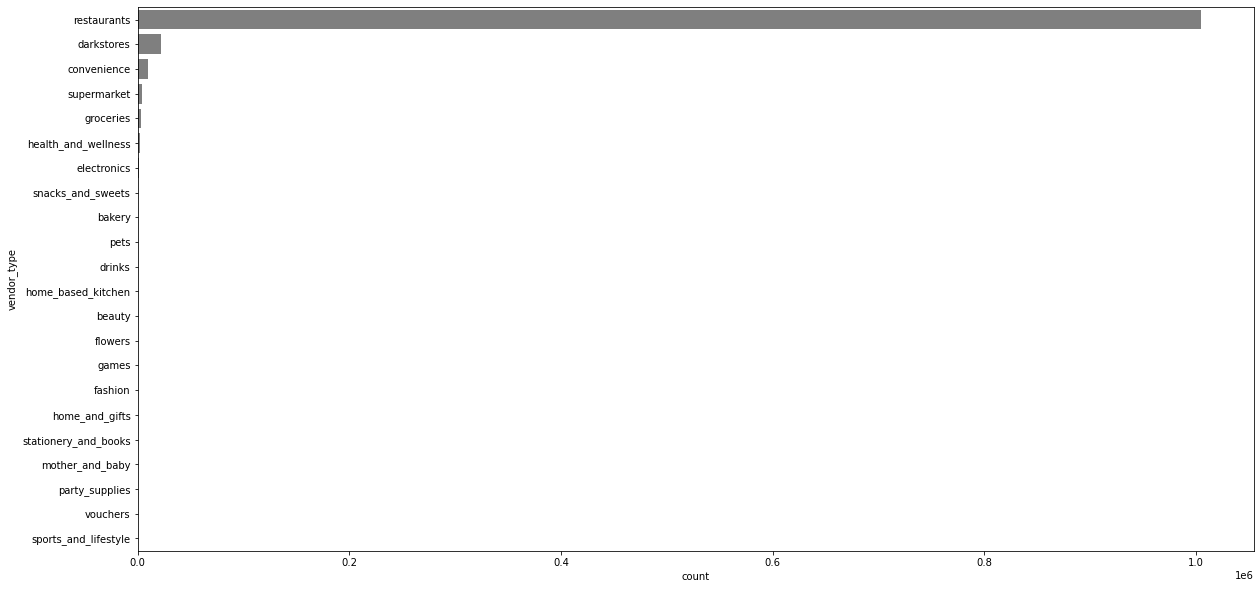

In [18]:
# to find out the number of orders each vendor type genertaed I will plota seaborn count plot of numbers of orders generated through each channel.

plt.figure(figsize = [20,10])

color = sb.color_palette()[7]
vendor_order = df['vendor_type'].value_counts().index
sb.countplot (data=df, y= 'vendor_type' , order = vendor_order, color = color);


In [19]:
# I will plot the relative frequencies on each bar to have a more clear understanding of the distribution.
vendor_count = df.vendor_type.value_counts()

In [20]:
n_df = df.shape[0]
max_vendor_count = vendor_count[0]
max_prop = max_vendor_count / n_df
print(max_prop)

0.9580630856161934


In [21]:
tick_props = np.arange (0, max_prop, 0.2)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
vendor_order = df['vendor_type'].value_counts().index

In [22]:
tick_props * n_df

array([     0., 209715., 419430., 629145., 838860.])

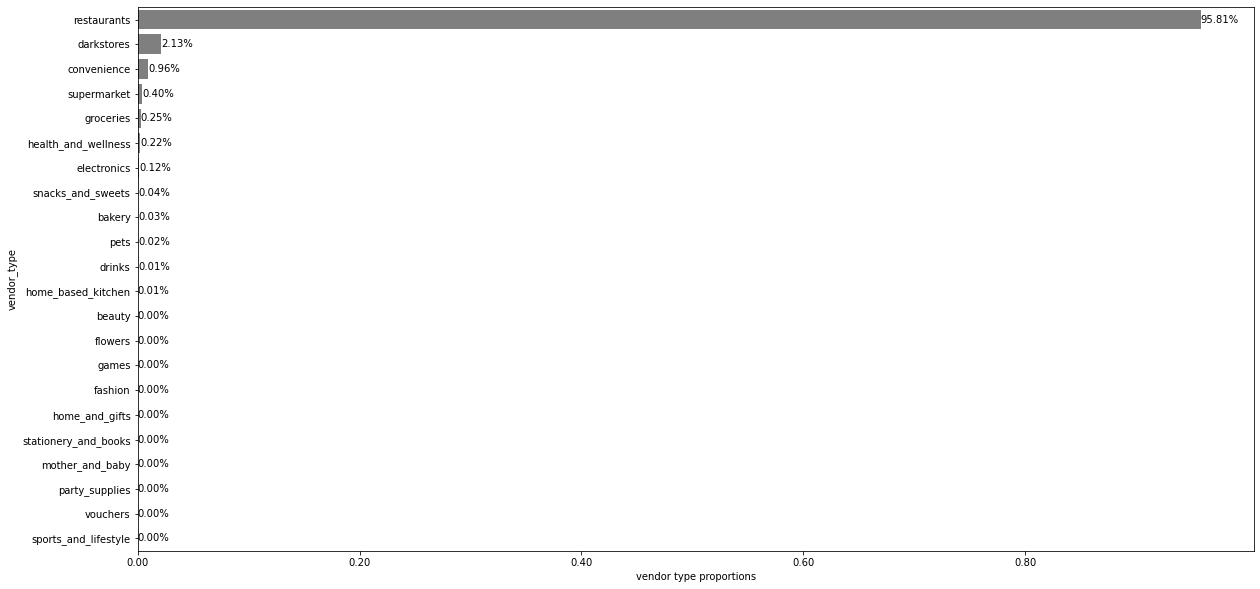

In [23]:
plt.figure(figsize = [20,10])
color = sb.color_palette()[7]
sb.countplot (data=df, y= 'vendor_type' , order = vendor_order, color = color)
plt.xticks (tick_props * n_df, tick_names)
plt.xlabel('vendor type proportions')
#adding its relative frequncy percentage to ech bar
for i in range(vendor_count.shape[0]):
    count = vendor_count[i]
    pct_string = '{:0.2f}%'.format(100*count/n_df)
    plt.text(count+1, i, pct_string, va = 'center');

## Customer Behaviour
### Restaurants :
- 96% of orders were successful with 4% failed rate, like dark stores only 3% of orders were made by first time shoppers, mobile is the only device used for this category.

- In terms of payment onine banking, cash on delivery stands in the first place followed by online banking and online card payment.

- Most majority of users were organic with rate of 83%.

- 97% of orders where delivered by company delivery service and only 3% preferred to pickup their orders themselves.




### Darkstores:
- 99% of orders were successful, only 4% of orders were made by first time shoppers, 99% of them used their mobile phone.

- In terms of payment onine banking, cash on delivery and card payment all had close rates with Online banking being on top.

- 61% of purchases were made through organic customers who didnt use any vouchers to complete their orders.

- 100% of orders were delivered to the customers


### Shops:
- In shops 90% of orders were successful, like dark stores only 4% of orders were made by first time shoppers, mobile is the solo dominant device for its users.

- In terms of payment onine banking, like darkstores but with higher rate cash on delivery stands in the first place followed by online banking and online card payment.

- 74% of purchases were made through organic customers who didnt use any vouchers to complete their orders.

- only 2% of customers picked up their orders and the rest had them delivered.

In [24]:
# creating different table names for three categories
df_rest = df[df['vendor_type'] == 'restaurants']
df_dark = df[df['vendor_type'] == 'darkstores']
df_shops = df[(df['vendor_type'] != 'darkstores') & (df['vendor_type'] != 'restaurants')]


In Restaurants:


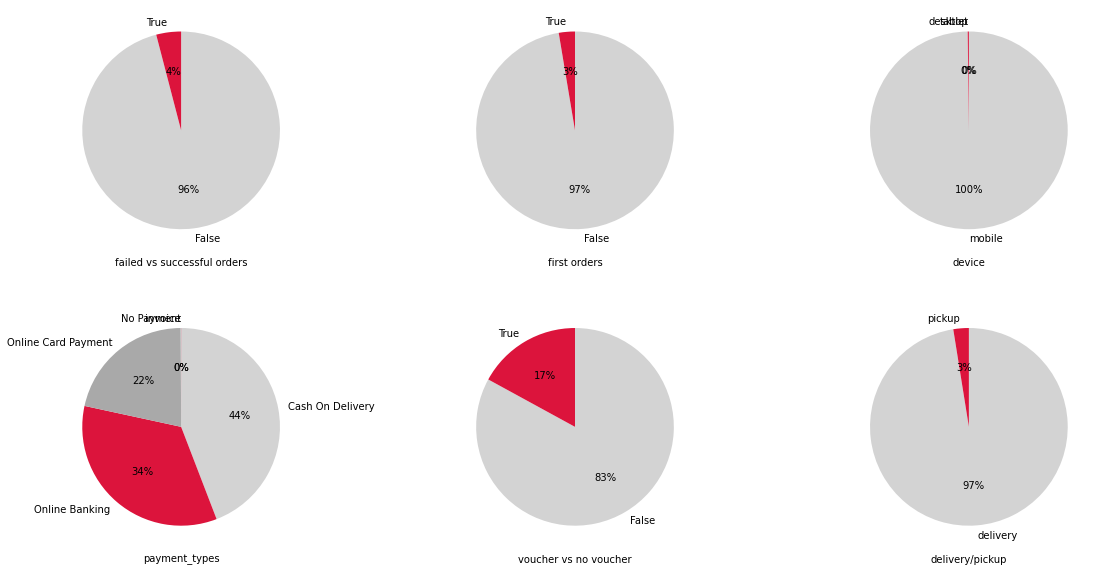

In [25]:
# in restaurants:
print('In Restaurants:')
plt.figure(figsize = [20,10])
colors = ["lightgray", "crimson", "darkgray"]

plt.subplot (2, 3, 1)
failed_order = df_rest.is_failed_order.value_counts()
plt.pie(failed_order, labels = failed_order.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('failed vs successful orders')



plt.subplot(2,3,2)
first_order = df_rest.is_first_order.value_counts()
plt.pie(first_order, labels = failed_order.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('first orders');


plt.subplot(2,3,3)
device = df_rest.device.value_counts()
plt.pie(device, labels = device.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('device')


plt.subplot(2,3,4)
payment_type = df_rest.payment_type.value_counts()
plt.pie(payment_type, labels = payment_type.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('payment_types')


plt.subplot(2,3,5)
voucher = df_rest.is_voucher_used.value_counts()
plt.pie(voucher, labels = voucher.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('voucher vs no voucher');

plt.subplot(2,3,6)
delivery_status = df_rest.delivery_pickup.value_counts()
plt.pie(delivery_status, labels = delivery_status.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('delivery/pickup');


In Darkstores:


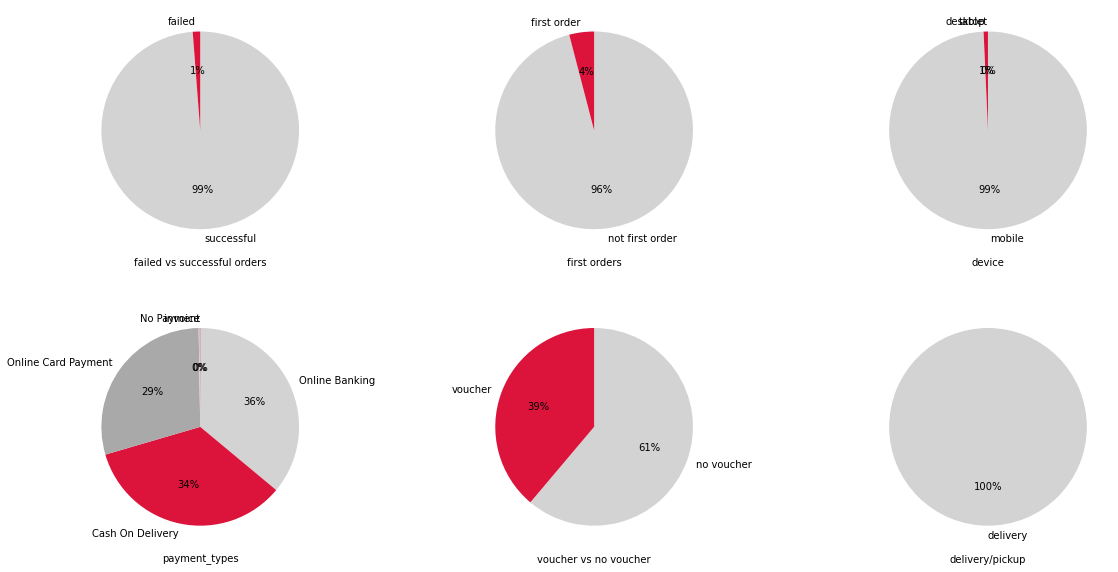

In [26]:
# the same thing for darkstores

print('In Darkstores:')
plt.figure(figsize = [20,10])
colors = ["lightgray", "crimson", "darkgray"]

plt.subplot (2, 3, 1)
failed_order = df_dark.is_failed_order.value_counts()
plt.pie(failed_order, labels = ['successful', 'failed'], startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('failed vs successful orders')



plt.subplot(2,3,2)
first_order = df_dark.is_first_order.value_counts()
plt.pie(first_order, labels = ['not first order', 'first order'], startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('first orders');


plt.subplot(2,3,3)
device = df_dark.device.value_counts()
plt.pie(device, labels = device.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('device')


plt.subplot(2,3,4)
payment_type = df_dark.payment_type.value_counts()
plt.pie(payment_type, labels = payment_type.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('payment_types')


plt.subplot(2,3,5)
voucher = df_dark.is_voucher_used.value_counts()
plt.pie(voucher, labels = ['no voucher', 'voucher'], startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('voucher vs no voucher')

plt.subplot(2,3,6)
delivery_status = df_dark.delivery_pickup.value_counts()
plt.pie(delivery_status, labels = delivery_status.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('delivery/pickup');


In Shops:


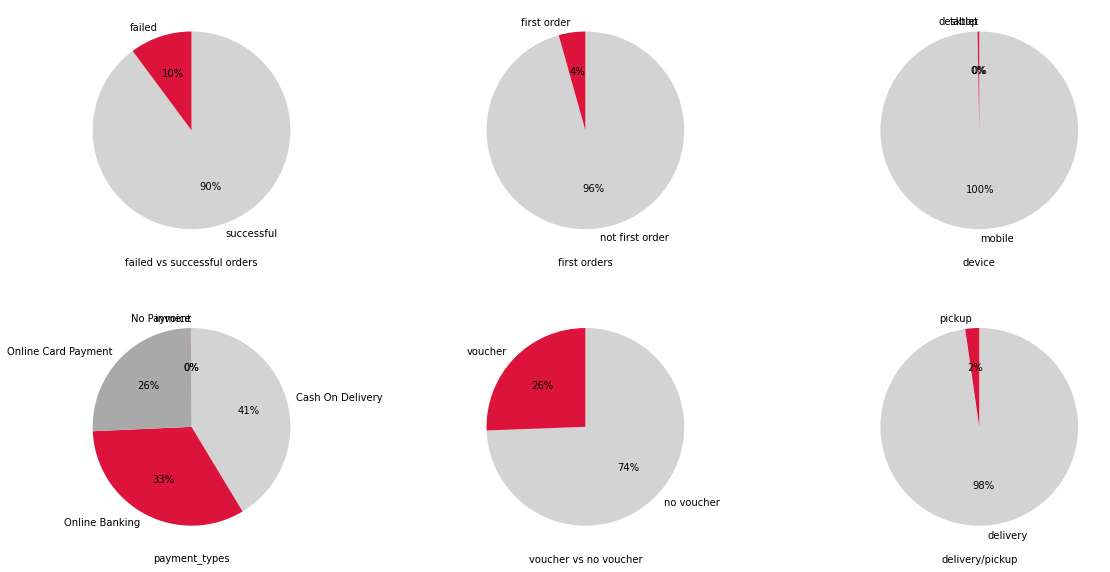

In [27]:
# I will plot that in shops:

print('In Shops:')
plt.figure(figsize = [20,10])
colors = ["lightgray", "crimson", "darkgray"]

plt.subplot (2, 3, 1)
failed_order = df_shops.is_failed_order.value_counts()
plt.pie(failed_order, labels = ['successful', 'failed'], startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('failed vs successful orders')



plt.subplot(2,3,2)
first_order = df_shops.is_first_order.value_counts()
plt.pie(first_order, labels = ['not first order', 'first order'], startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('first orders');


plt.subplot(2,3,3)
device = df_shops.device.value_counts()
plt.pie(device, labels = device.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('device')



plt.subplot(2,3,4)
payment_type = df_shops.payment_type.value_counts()
plt.pie(payment_type, labels = payment_type.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('payment_types')


plt.subplot(2,3,5)
voucher = df_shops.is_voucher_used.value_counts()
plt.pie(voucher, labels = ['no voucher', 'voucher'], startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('voucher vs no voucher')

plt.subplot(2,3,6)
delivery_status = df_shops.delivery_pickup.value_counts()
plt.pie(delivery_status, labels = delivery_status.index, startangle = 90, counterclock =False, colors = colors, autopct='%1.f%%');
plt.xlabel('delivery/pickup');

## Order Distribution in different cities for three vendor categories:

- top 4 cities with most number of orders are the same among all three categories. 

- cities are: Klang Valley, Johor, Penang, Perak

In Restaurants :


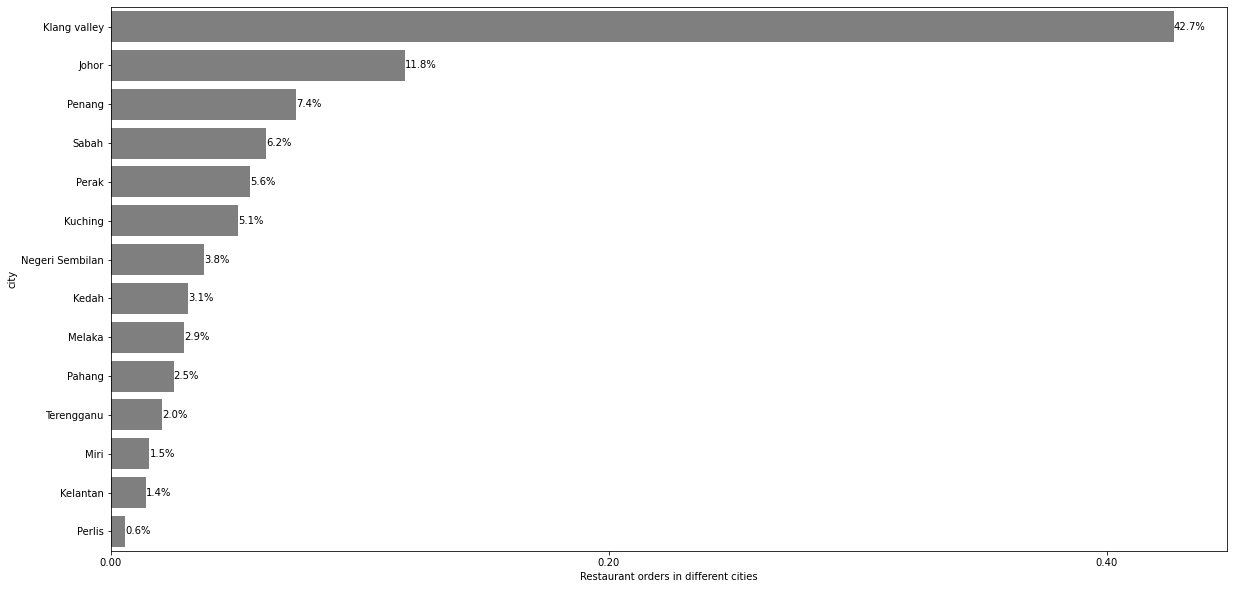

In [28]:
# restaurants:
print('In Restaurants :')
city_count_rest = df_rest.city.value_counts()
n_df = df_rest.shape[0]
max_city_count_rest = city_count_rest[0]
max_prop = max_city_count_rest / n_df


tick_props = np.arange (0, max_prop, 0.2)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
city_order_rest = df_rest['city'].value_counts().index

plt.figure(figsize = [20,10])
color = sb.color_palette()[7]
sb.countplot (data=df_rest, y= 'city' , order = city_order_rest, color = color)
plt.xticks (tick_props * n_df, tick_names)
plt.xlabel('Restaurant orders in different cities')
#adding its relative frequncy percentage to ech bar
for i in range(city_count_rest.shape[0]):
    count = city_count_rest[i]
    pct_string = '{:0.1f}%'.format(100*count/n_df)
    plt.text(count+1, i, pct_string, va = 'center');



In Darkstores :


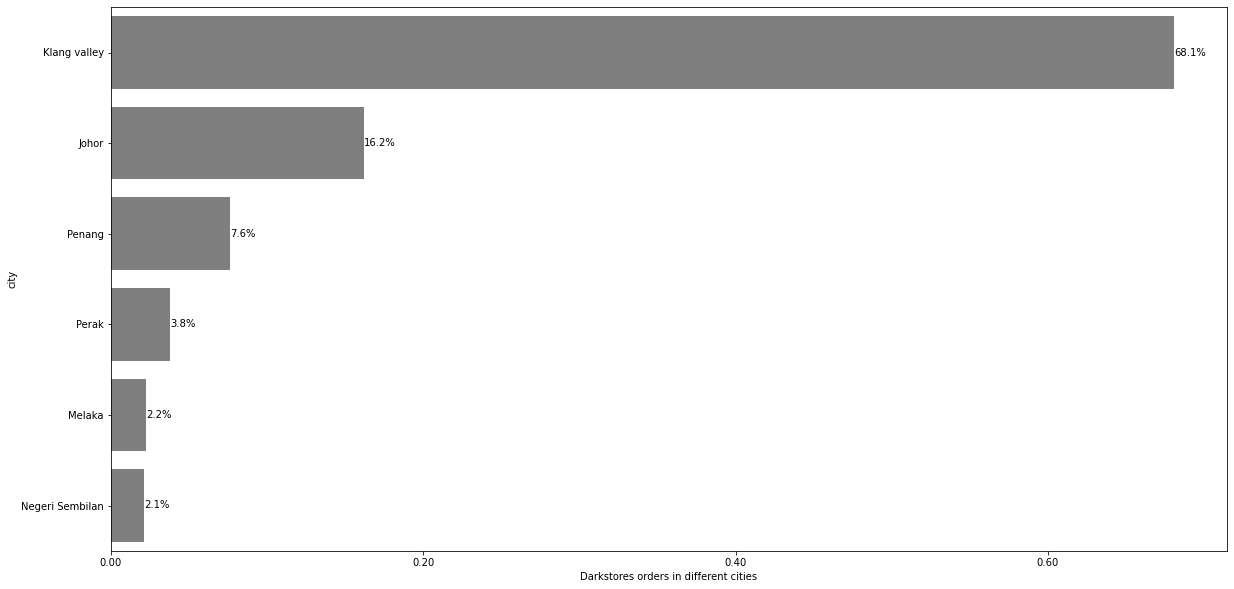

In [29]:
#darkstores:
print('In Darkstores :')
city_count_dark = df_dark.city.value_counts()
n_df = df_dark.shape[0]
max_city_count_dark = city_count_dark[0]
max_prop = max_city_count_dark/ n_df


tick_props = np.arange (0, max_prop, 0.2)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
city_order_dark = df_dark['city'].value_counts().index

plt.figure(figsize = [20,10])
color = sb.color_palette()[7]
sb.countplot (data=df_dark, y= 'city' , order = city_order_dark, color = color)
plt.xticks (tick_props * n_df, tick_names)
plt.xlabel('Darkstores orders in different cities')
#adding its relative frequncy percentage to ech bar
for i in range(city_count_dark.shape[0]):
    count = city_count_dark[i]
    pct_string = '{:0.1f}%'.format(100*count/n_df)
    plt.text(count+1, i, pct_string, va = 'center');
    
    
   

In Shops :


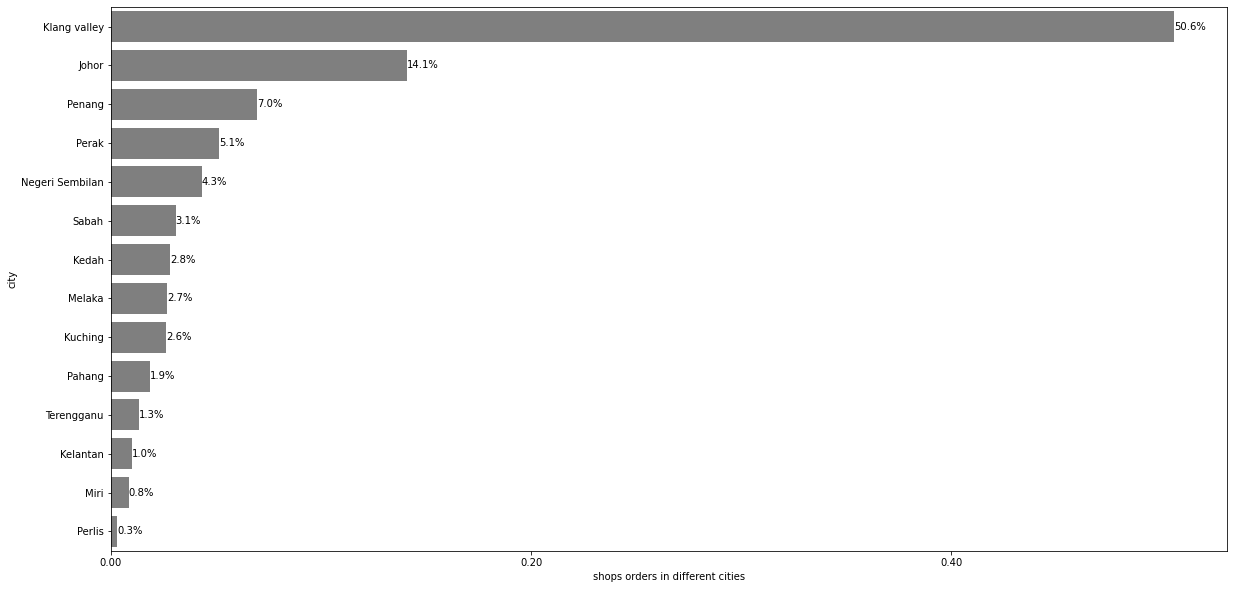

In [30]:
# Shops:
print ( 'In Shops :')
city_count_shops = df_shops.city.value_counts()
n_df = df_shops.shape[0]
max_city_count_shops = city_count_shops[0]
max_prop = max_city_count_shops/ n_df


tick_props = np.arange (0, max_prop, 0.2)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
city_order_shops = df_shops['city'].value_counts().index

plt.figure(figsize = [20,10])
color = sb.color_palette()[7]
sb.countplot (data=df_shops, y= 'city' , order = city_order_shops, color = color)
plt.xticks (tick_props * n_df, tick_names)
plt.xlabel('shops orders in different cities')
#adding its relative frequncy percentage to ech bar
for i in range(city_count_shops.shape[0]):
    count = city_count_shops[i]
    pct_string = '{:0.1f}%'.format(100*count/n_df)
    plt.text(count+1, i, pct_string, va = 'center');

## Hours with most number of orders in each vendor category:
- top order hour for restaurants and shops is lunch time at 1PM, however users prefer to make orders from darkstores at night time around 8pm

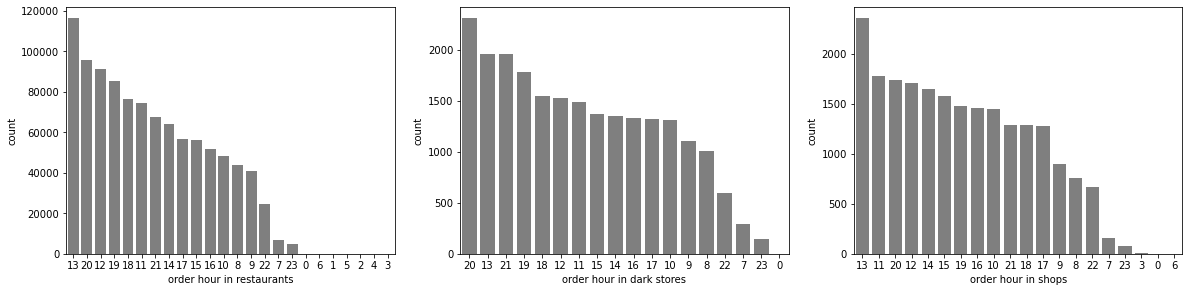

In [31]:

plt.figure(figsize = [20,10])

plt.subplot (2, 3, 1)
color = sb.color_palette()[7]
hour_count = df_rest['order_hour'].value_counts().index
sb.countplot (data=df_rest, x= 'order_hour' , order = hour_count, color = color)
plt.xlabel('order hour in restaurants')


plt.subplot (2, 3, 2)
color = sb.color_palette()[7]
hour_count = df_dark['order_hour'].value_counts().index
sb.countplot (data=df_dark, x= 'order_hour' , order = hour_count, color = color)
plt.xlabel('order hour in dark stores')


plt.subplot (2, 3, 3)
color = sb.color_palette()[7]
hour_count = df_shops['order_hour'].value_counts().index
sb.countplot (data=df_shops, x= 'order_hour' , order = hour_count, color = color)
plt.xlabel('order hour in shops');

## Money generated in each vendor category:
- It is fair to assume that the average amount of money generted per order is less in restaurants, around 20 RM with compared with shops and dark stores which is around 30 RM. However, the distribution is narrower and closer to normal distribution in restaurant implying the less standard deviation in resturants.

- Dark stores however, show 3 peak points (first 40 RM and 10 and 20 being next two peaks).

- In shops there is a harsh surge to the peak whils in restaurant the transition to peak is smoother.

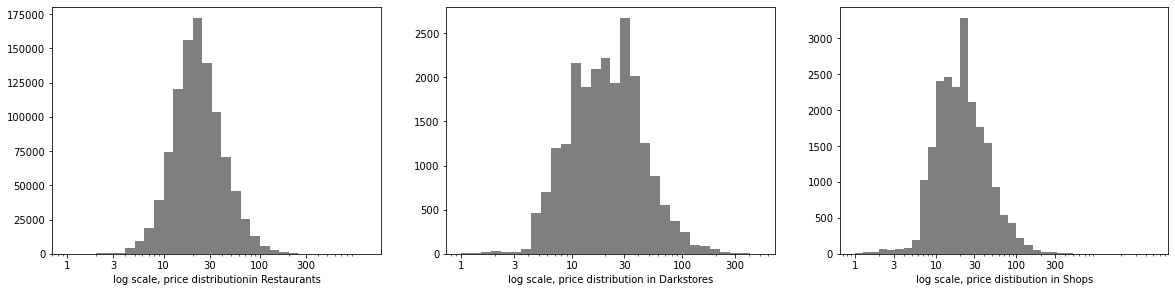

In [32]:
plt.figure(figsize = [20,10])

plt.subplot (2, 3, 1)
color = sb.color_palette()[7]
bins = 10** np.arange (0, 3.05+0.1, 0.1)
ticks = [ 1, 3, 10, 30, 100, 300]
labels = [ '{}'.format(v) for v in ticks]
plt.hist(data= df_rest, x = 'total_amount', bins=bins, color = color);
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('log scale, price distributionin Restaurants')

plt.subplot (2, 3, 2)
bins = 10** np.arange (0, 2.7+0.09, 0.09)
ticks = [ 1, 3, 10, 30, 100, 300]
labels = [ '{}'.format(v) for v in ticks]
plt.hist(data= df_dark, x = 'total_amount', bins=bins, color= color);
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('log scale, price distribution in Darkstores')

plt.subplot (2, 3, 3)
#Log Scaling: 
color = sb.color_palette()[7]
bins = 10** np.arange (0, 3.64+0.1, 0.1)
ticks = [ 1, 3, 10, 30, 100, 300]
labels = [ '{}'.format(v) for v in ticks]
plt.hist(data= df_shops, x = 'total_amount', bins=bins, color= color);
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('log scale, price distibution in Shops');



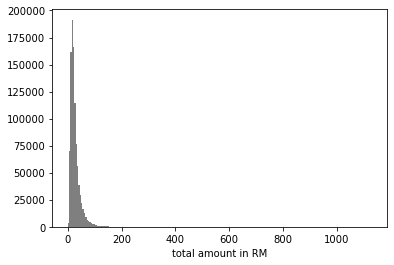

In [33]:
#total amount distibution among restaurant:
bins = np.arange (0, df_rest['total_amount'].max()+5,5)
plt.hist(data= df_rest, x = 'total_amount', bins=bins, color=color);
plt.xlabel('total amount in RM');

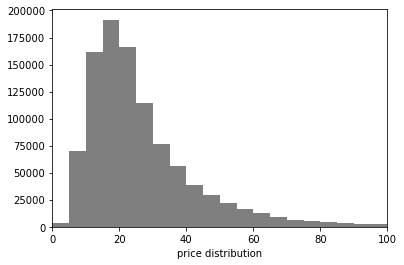

In [34]:
bins = np.arange (0, df_rest['total_amount'].max()+5,5)
plt.hist(data= df_rest, x = 'total_amount', bins=bins, color=color);

plt.xlim(0,100)
plt.xlabel('price distribution');

In [35]:
#log scaling
pd.options.display.float_format = '{:.2f}'.format
df_rest.total_amount.describe()

count   1004601.00
mean         27.17
std          19.48
min           0.00
25%          15.30
50%          22.05
75%          32.73
max        1125.41
Name: total_amount, dtype: float64

In [36]:
np.log10(df_rest.total_amount.describe())

C:\Users\s.oftadeh\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count   6.00
mean    1.43
std     1.29
min     -inf
25%     1.18
50%     1.34
75%     1.51
max     3.05
Name: total_amount, dtype: float64

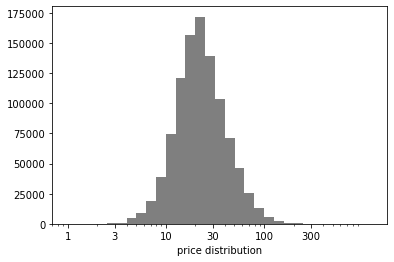

In [37]:
color = sb.color_palette()[7]
bins = 10** np.arange (0, 3.05+0.1, 0.1)
ticks = [ 1, 3, 10, 30, 100, 300]
labels = [ '{}'.format(v) for v in ticks]
plt.hist(data= df_rest, x = 'total_amount', bins=bins, color = color);
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('price distribution');

### For Darkstores:


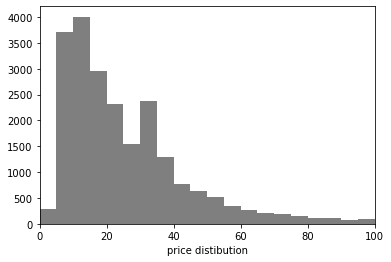

In [38]:
bins = np.arange (0, df_dark['total_amount'].max()+5,5)
plt.hist(data= df_dark, x = 'total_amount', bins=bins, color= color)
plt.xlim(0,100)
plt.xlabel('price distibution');

In [39]:
# dark store total amount sidtribution
df_dark.total_amount.describe()

count   22382.00
mean       27.27
std        25.36
min         0.00
25%        11.61
50%        20.45
75%        33.86
max       454.38
Name: total_amount, dtype: float64

In [40]:
np.log10(df_dark.total_amount.describe())

count   4.35
mean    1.44
std     1.40
min     -inf
25%     1.06
50%     1.31
75%     1.53
max     2.66
Name: total_amount, dtype: float64

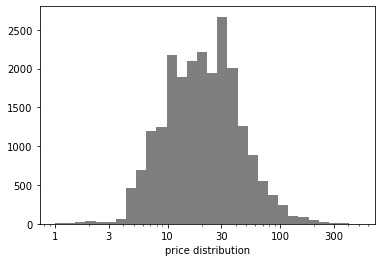

In [41]:
# Log Scaling: 
bins = 10** np.arange (0, 2.7+0.09, 0.09)
ticks = [ 1, 3, 10, 30, 100, 300]
labels = [ '{}'.format(v) for v in ticks]
plt.hist(data= df_dark, x = 'total_amount', bins=bins, color= color);
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('price distribution');

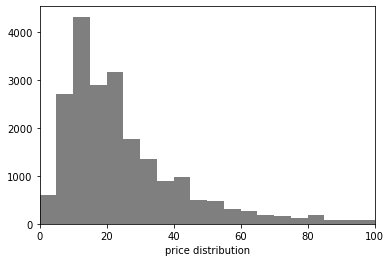

In [42]:
bins = np.arange (0, df_shops['total_amount'].max()+5,5)
plt.hist(data= df_shops, x = 'total_amount', bins=bins, color= color);
plt.xlim(0,100)
plt.xlabel('price distribution');

In [43]:
np.log10(df_shops.total_amount.describe())

count   4.33
mean    1.45
std     1.76
min     -inf
25%     1.08
50%     1.30
75%     1.51
max     3.64
Name: total_amount, dtype: float64

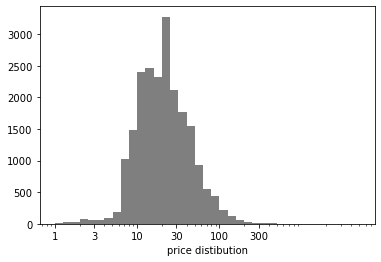

In [44]:
#Log Scaling: 
color = sb.color_palette()[7]
bins = 10** np.arange (0, 3.64+0.1, 0.1)
ticks = [ 1, 3, 10, 30, 100, 300]
labels = [ '{}'.format(v) for v in ticks]
plt.hist(data= df_shops, x = 'total_amount', bins=bins, color= color);
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('price distibution');

- As results it fair to assume that the average amount of money generted per order is less in restaurants, around 20 RM with compared in shops and dark stores which is around 30 RM. however the distribution is narrower and closer to normal distribution in restaurant implying the less standard deviation in resturants. 

- Dark stores however, show 3 peak points (first 40 RM and 10 and 20 being next two peaks).

- in shops there is a harsh surge to the peak whils in restaurant the transition to peak amount is smoother. 

## Expected delivery time in each vendor category:
- hTe trend is right skewed in all three graphs with three peak points in restaurants indicaitng 20, 27 and 32 minutes in delivery time.

- In darkstores expected delivery time reaches to peaks of 19 and 30 minutes but the highest point is about 25 minutes.

- Shops represent more outliers in delivery time and the peak is about 30 minutes. Overall expected delivery time is highest in shops.

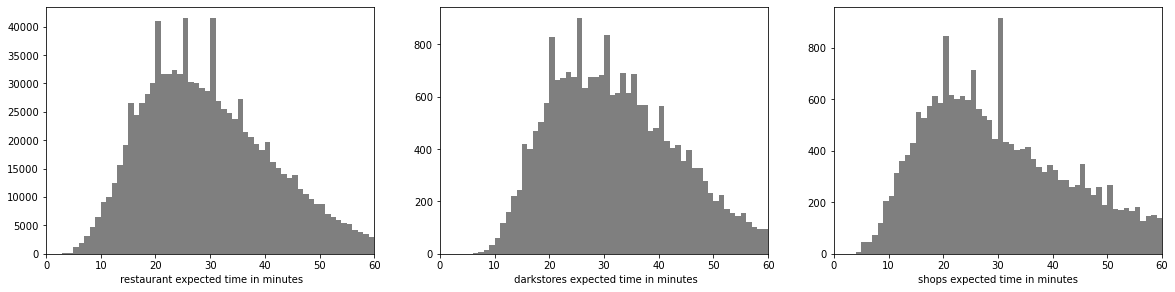

In [45]:
plt.figure(figsize = [20,10])
color = sb.color_palette()[7]


plt.subplot (2, 3, 1)
bins = np.arange (0, df_rest['expected_delivery_in_minutes'].max()+1, 1)
plt.hist(data= df_rest, x = 'expected_delivery_in_minutes', bins=bins, color= color);
plt.xlim(0, 60)
plt.xlabel(' restaurant expected time in minutes')




plt.subplot (2, 3, 2)
bins = np.arange (0, df_dark['expected_delivery_in_minutes'].max()+1, 1)
plt.hist(data= df_dark, x = 'expected_delivery_in_minutes', bins=bins, color= color);
plt.xlim(0, 60)
plt.xlabel(' darkstores expected time in minutes')



plt.subplot (2, 3, 3)
bins = np.arange (0, df_shops['expected_delivery_in_minutes'].max()+1, 1)
plt.hist(data= df_shops, x = 'expected_delivery_in_minutes', bins=bins, color= color);
plt.xlim(0, 60)
plt.xlabel('shops expected time in minutes');

# Some Insight in Restaurants:

## Money generated vs. hour of order
- In restaurants numbers of orders peaked at lunch time (13pm), followed by a downward trend until dinner time which again goes to its highest point around 8 and plummeted right after.
- The total money generated followes the same trend, however the amount per order during lunch time suggest the presence of an outlier, generating 1000 RM.

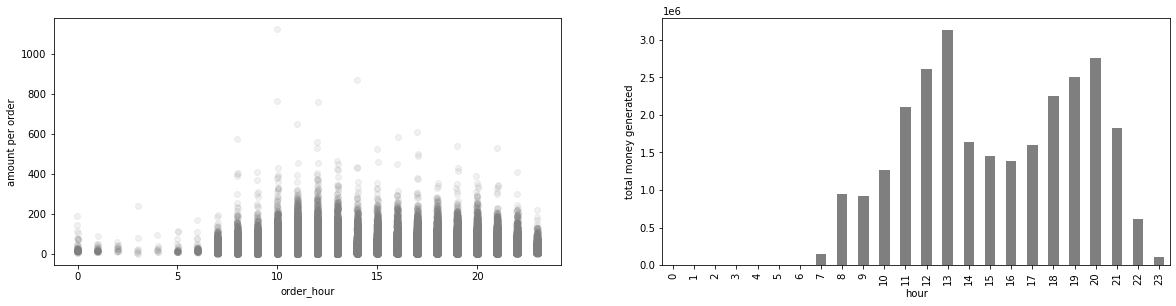

In [46]:
plt.figure(figsize = [20,10])

plt.subplot (2, 2, 1)

sb.regplot(data = df_rest, x = 'order_hour', y = 'total_amount', x_jitter = 0.04, scatter_kws = {'alpha' : 1/10}, fit_reg = False, color= color);
plt.xlabel('order_hour')
plt.ylabel('amount per order')

plt.subplot (2, 2, 2)

hour_total = df_rest.groupby('order_hour').total_amount.sum()
hour_total.plot.bar(color= color)
plt.xlabel('hour')
plt.ylabel('total money generated');

## Expected delivery time and the hour of order
- the most deliveries are taking place during lunch and about 25 minutes wait. As we move toward dinner time there is few orders with less that 10 minutes although we have faster deliveries in lunch time.




Note: Time of the day are categoried into 6 groups:

- after_midnight
- early_breakfast
- brunch
- lunch
- evening_snack
- dinner

In [47]:
df_rest[df_rest['expected_delivery_in_minutes']== 22132.0].index

Int64Index([706249], dtype='int64')

In [48]:
# there seems to be one point with abnormal value, lets drop that one point.
df_rest.drop(df_rest[df_rest['expected_delivery_in_minutes']== 22132.0].index, inplace=True)

C:\Users\s.oftadeh\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
#check if it is successfully dropped. 
df_rest[df_rest['expected_delivery_in_minutes']== 22132.0]

,order_id,payment_type,city,zone,vendor_type,delivery_pickup,vendor_daily_order_number,total_amount,is_first_order,is_failed_order,is_voucher_used,expected_delivery_in_minutes,device,order_time,order_hour


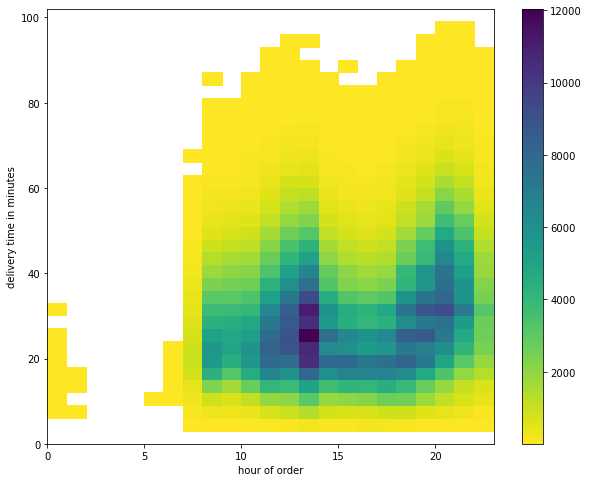

In [50]:
plt.figure(figsize = [10,8])
bin_x = np.arange(0, 23+1, 1)
bin_y = np.arange (0, 100+3, 3)
plt.hist2d(data = df_rest, x= 'order_hour', y = 'expected_delivery_in_minutes', cmin= 5, cmap = 'viridis_r', bins = [bin_x, bin_y]);
plt.colorbar()
plt.xlabel('hour of order')
plt.ylabel('delivery time in minutes');

In [51]:
bins = np.arange(0, 28, 4)
# categories are labled like this
bins_names = ['after_midnight', 'early_breakfast', 'brunch', 'lunch', 'evening_snack', 'dinner']
df_rest['time_segment'] = pd.cut(df['order_hour'], bins,  labels=bins_names, right=False)

<ipython-input-51-7f7dd7d43a0f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rest['time_segment'] = pd.cut(df['order_hour'], bins,  labels=bins_names, right=False)


In [52]:
# this is a finction that generates distibution of failed/successful orders in unit % across all categories:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()


## Failed/Successful and delivery time per group:
- the most number of successful orders falls in lunch time where the number of orders surges, with low fail rate, however the second most failed orders occurs in the second highest time in demand for delivery. 

- the average delivery time during each group increases as we move on further during a day, the alarming part is in "dinner" time, since it is account for the highest demands in orders but both high delivery time and hight fail rate indicate that, fail rates could be due to high expected time. 

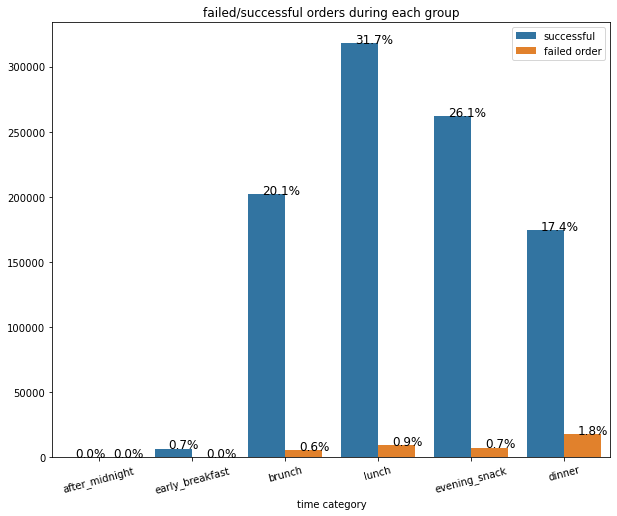

In [53]:
plt.figure(figsize = [10, 8])


ax = sb.countplot(data = df_rest, x = 'time_segment', hue = 'is_failed_order', dodge = True)
ax.set_title('failed/successful orders during each group')
ax.set(xlabel = 'time category', ylabel ='')
ax.legend( ['successful','failed order']);
plt.xticks(rotation =15);



without_hue(ax, df_rest.time_segment)

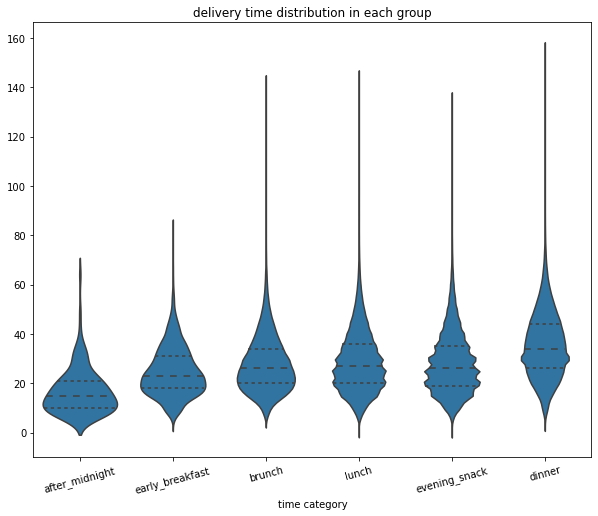

In [54]:
# take a look at distibution of delivery time in each category:
plt.figure(figsize = [10, 8])
base_color = sb.color_palette()[0]
ax = sb.violinplot(data = df_rest, x ='time_segment', y = 'expected_delivery_in_minutes', color = base_color, inner = 'quartile')
ax.set_title('delivery time distribution in each group')
ax.set(xlabel = 'time category', ylabel = '')
plt.xticks( rotation =15);

## Hour of order vs expected delivery time vs order status
- failed orders increase during dinner time, however highest demand in orders lies within lunch time and decrease in during dinner.

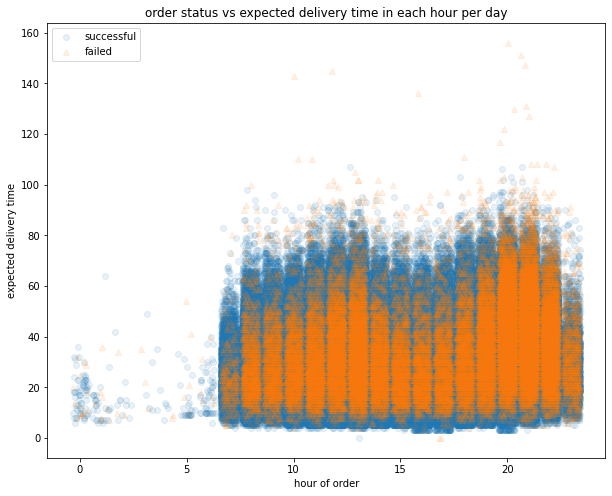

In [55]:
plt.figure(figsize = [10, 8])

ttype_markers = [[False, 'o'],
                 [True, '^']]
for ttype, marker in ttype_markers:
    plot_data =df_rest.loc[df_rest['is_failed_order'] == ttype]
    sb.regplot(data =plot_data, x = 'order_hour' , y = 'expected_delivery_in_minutes', x_jitter = 0.4 , fit_reg = False, scatter_kws={'alpha':0.1}, marker =marker)                       

    
plt.xlabel ('hour of order')
plt.ylabel('expected delivery time')
plt.legend (['successful', 'failed'])
plt.title('order status vs expected delivery time in each hour per day');

## delivery/pickup time vs status of orders
- Pick up time is drastically less than delivery expected time and the trend is static from lunch to dinner for pickup.

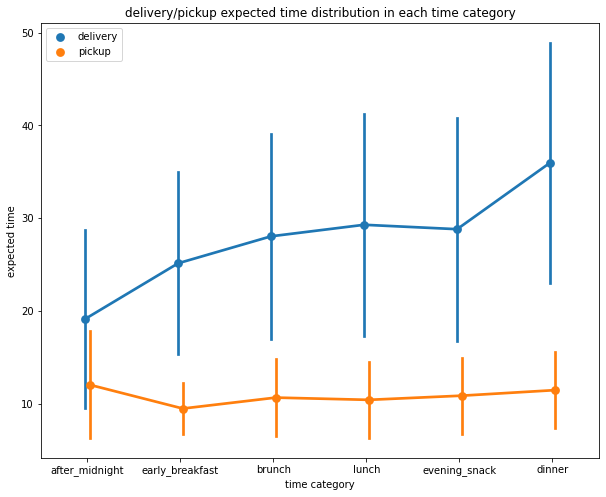

In [56]:
plt.figure(figsize = [10, 8])
sb.pointplot( data = df_rest, x ='time_segment', y = 'expected_delivery_in_minutes', hue = 'delivery_pickup',
            ci = 'sd', linestyle = "", dodge = True)
plt.xlabel ('time category')
plt.ylabel('expected time')
plt.title('delivery/pickup expected time distribution in each time category');
plt.legend ();

In [ ]:
!jupyter nbconvert project_slides2.ipynb --to slides --post serve --no-input --no-prompt